Impendencies

In [1]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from natsort import natsorted
from sklearn.metrics.pairwise import cosine_similarity

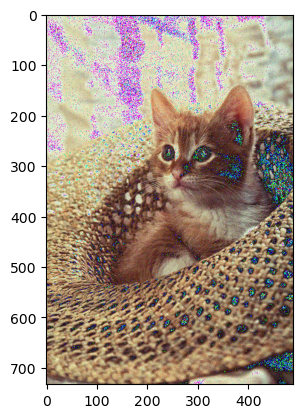

In [8]:
im_path = "static/uploads/cat.png"
image = cv2.imread(im_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rows, cols,_= image.shape
noise = np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)
noisy_image = image + noise
plt.imshow(noisy_image)

Read image

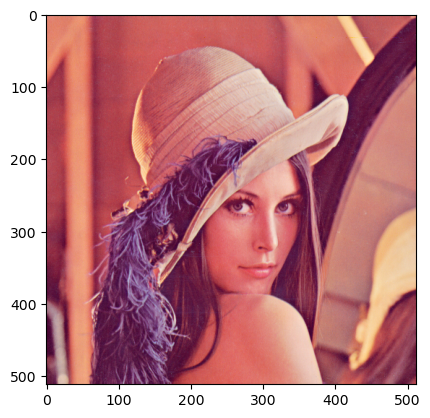

In [4]:
image = cv2.imread("images/lenna.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [21]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image", c_map = False):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    if c_map is True:
        plt.imshow(image_1, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    if c_map is True:
        plt.imshow(image_2, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

# Noisy

Add noise

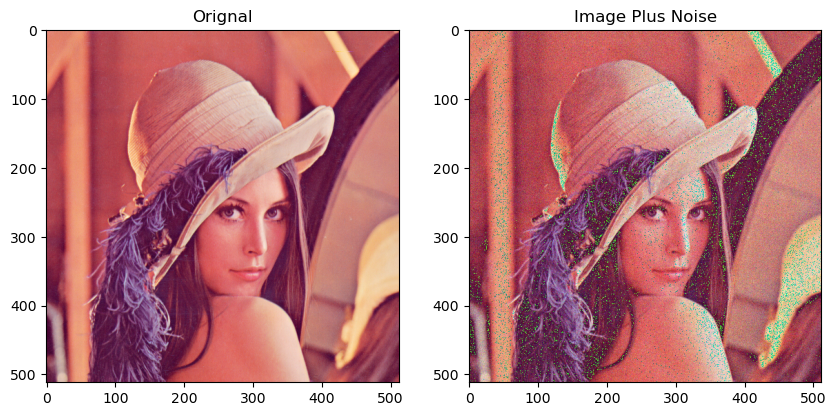

In [6]:
rows, cols,_= image.shape
noise = np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)
noisy_image = image + noise
plot_image(image, noisy_image, title_1="Orignal",title_2="Image Plus Noise")

## Denoise

Filtering Noise

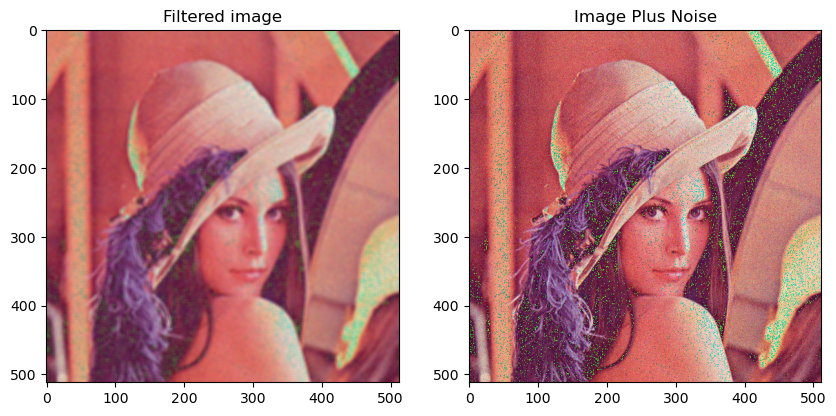

In [23]:
kernel = np.ones((6,6))/36
image_filtered = cv2.filter2D(src=noisy_image, ddepth=-1, kernel=kernel)
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

Gaussian Blur

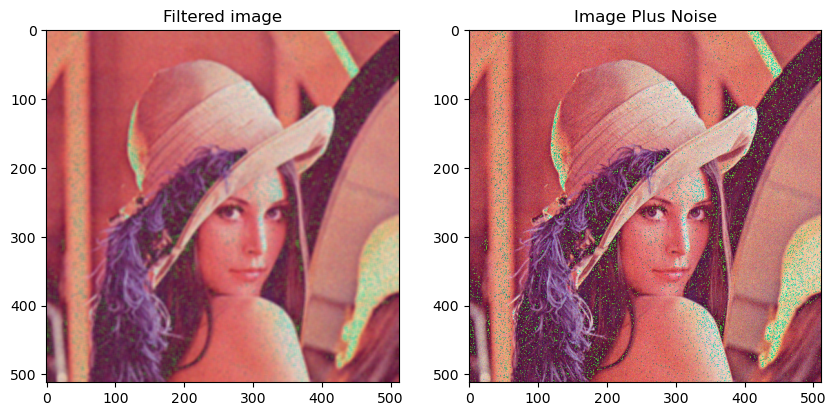

In [24]:
gaussian_filtered = cv2.GaussianBlur(noisy_image,(5,5),sigmaX=4,sigmaY=4)
plot_image(gaussian_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

Meadian Blur

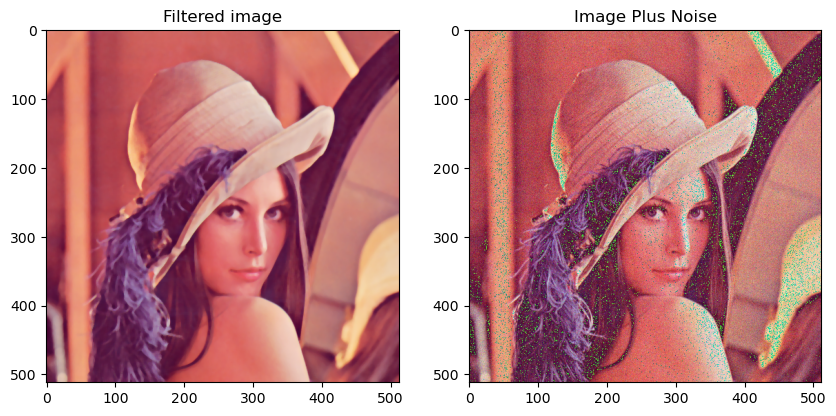

In [25]:
median_filtered = cv2.medianBlur(image, 5)
plot_image(median_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

Mean Blur

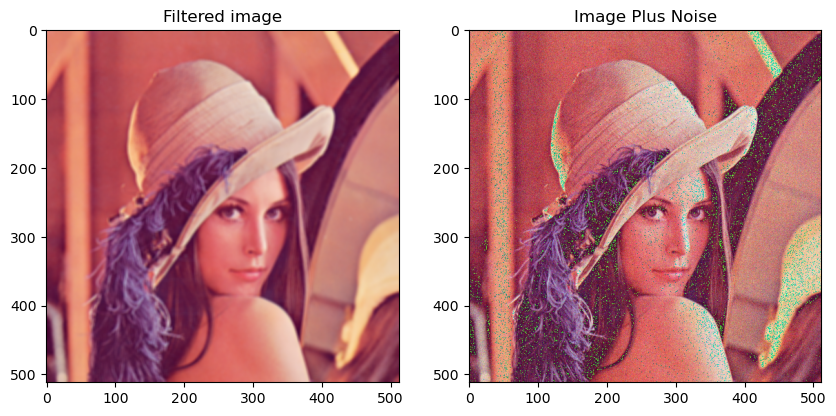

In [26]:
mean_filtered = cv2.blur(image, (5, 5))
plot_image(mean_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

# Image shapering

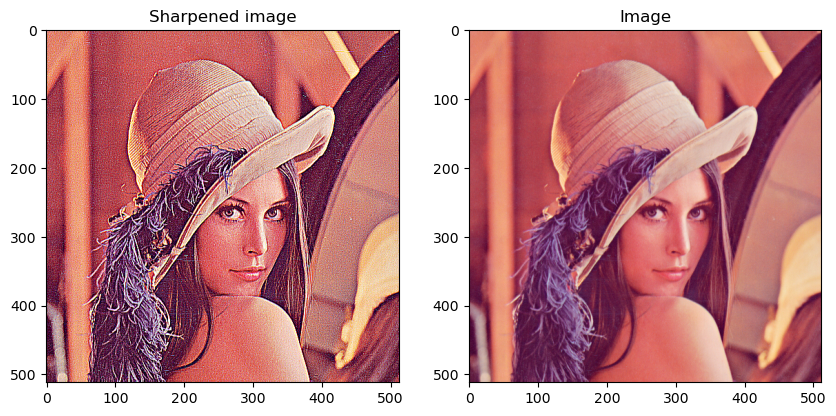

In [32]:
# Common Kernel for image sharpening
strong_kernel = np.array([[-1, -1, -1],
                              [-1, 10, -1],
                              [-1, -1, -1]])
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])

light_kernel = np.array([[ 0, -1,  0],
                              [-1,  5, -1],
                              [ 0, -1,  0]])
# Applys the sharpening filter using kernel on the original image without noise
sharpened = cv2.filter2D(image, -1, kernel)
# Plots the sharpened image and the original image without noise
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

# Edge detection

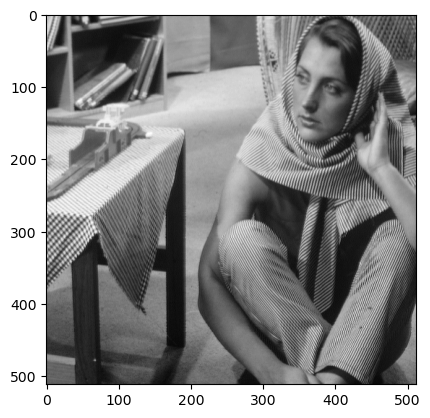

In [17]:
img_gray = cv2.imread('images/barbara.png', cv2.IMREAD_GRAYSCALE)
# smooth the image, this decreases changes that may be caused by noise that would  affect the gradient
img_gray = cv2.GaussianBlur(img_gray,(3,3),sigmaX=0.1,sigmaY=0.1)
plt.imshow(img_gray ,cmap='gray')

# Sobel

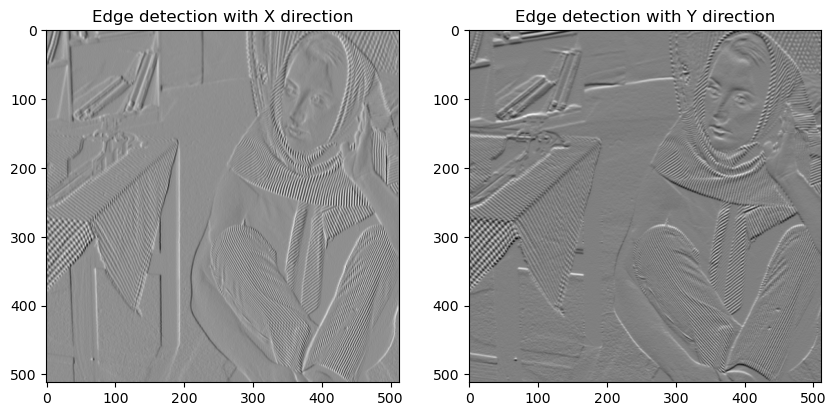

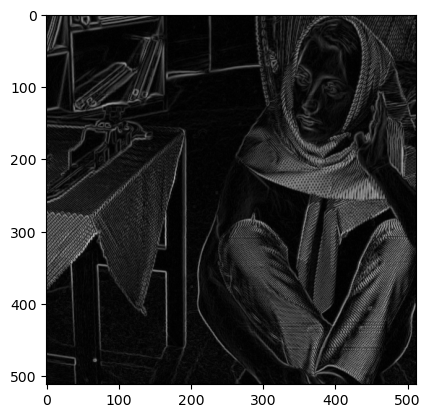

In [39]:
ddepth = cv2.CV_64F
# Applys the filter on the image in the X direction
grad_x = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=1, dy=0, ksize=3)
# Applys the filter on the image in the Y direction
grad_y = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=0, dy=1, ksize=3)
plot_image(grad_x, grad_y, title_1="Edge detection with X direction", title_2="Edge detection with Y direction", c_map=True)

sobel_combined = cv2.magnitude(grad_x, grad_y)
sharp_image = cv2.convertScaleAbs(sobel_combined)
plt.imshow(sobel_combined ,cmap='gray')

Prewitt

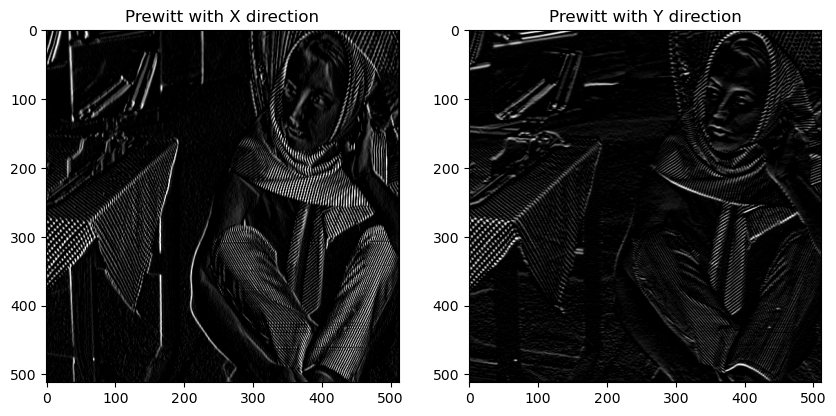

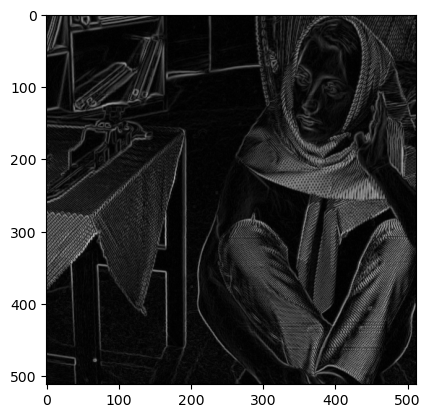

In [37]:
prewitt_x = np.array([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]])

prewitt_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]])

prewitt_x = cv2.filter2D(img_gray, -1, prewitt_x)
prewitt_y = cv2.filter2D(img_gray, -1, prewitt_y)
plot_image(prewitt_x, prewitt_y, title_1="Prewitt with X direction", title_2="Prewitt with Y direction", c_map=True)
prewitt_combined = cv2.magnitude(prewitt_x.astype(float), prewitt_y.astype(float))
plt.imshow(sobel_combined ,cmap='gray')

Canny Edge

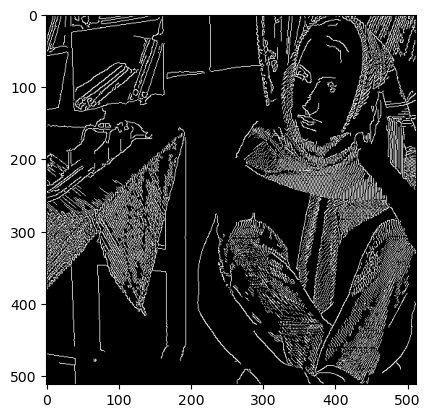

In [40]:
canny = cv2.Canny(img_gray, 100, 200)

plt.imshow(canny ,cmap='gray')